各種必要なものをいれる

In [4]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import numpy as np
from qiskit import transpile
from qiskit.quantum_info import Kraus, SuperOp, Operator
from qiskit.extensions import RYGate
from qiskit.providers.aer import AerSimulator
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
import scipy.optimize as opt
import statistics
import math
%matplotlib inline
import matplotlib.pyplot as plt

nqubit adaptive測定

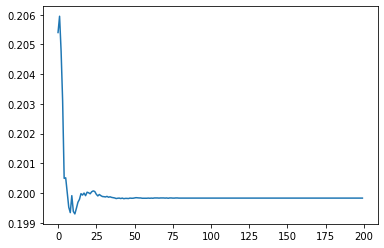

0.19993706591395394
5.208603954305926e-07
5.222167926398989e-07
6.374316919859369e-08


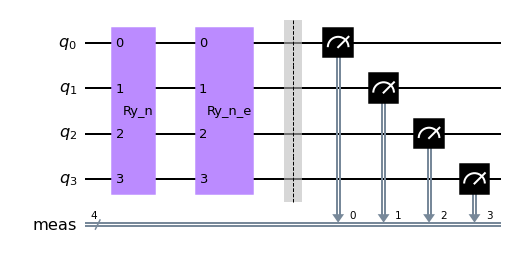

In [4]:
a=0.2
p=0.9
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_e=[]
n0=[]
n1=[]
n2=[]
theta_0=[pi/4]
Ng=[]
m=[]
qlist=[]
it=1
N=1000
n=4
amf=200
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
N1='0'*(n-1)+'1'
I_1=Operator([[1,0],[0,1]])
I_n=Operator([[1,0],[0,1]])
for o in range(n-2):
    I_n=I_1.tensor(I_n)
for k in range(amf):
    Ng.append(2*k+1)
    m.append(k+1)
    n0.append([])
    n1.append([])
    n2.append([])
    for i in range(it):
        theta_e=2*Ng[k]*theta_0[i+k*it]+pi/2
        Ry=Operator(RYGate(2*Ng[k]*theta))
        Ry_e=Operator(RYGate(-theta_e))
        Ry_n=I_n.tensor(Ry)
        Ry_n_e=I_n.tensor(Ry_e)
        circ_e_n=QuantumCircuit(n)
        circ_e_n.unitary(Ry_n,qlist,label='Ry_n')
        circ_e_n.unitary(Ry_n_e,qlist,label='Ry_n_e')
        circ_e_n.measure_all()
        # Create an empty noise model
        noise_depolarizing = NoiseModel()
        noise_depolarizing.add_basis_gates(['unitary'])
        # Add depolarizing error to all single qubit u1, u2, u3 gates
        error = depolarizing_error(1-p**m[k], n)
        noise_depolarizing.add_all_qubit_quantum_error(error, 'Ry_n')
        # Create noisy simulator backend
        sim_noise = AerSimulator(noise_model=noise_depolarizing)
        # Transpile circuit for noisy basis gates
        circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
        # Run and get counts
        result_noise = sim_noise.run(circ_e_n_tnoise,shots=N).result()
        counts_noise = result_noise.get_counts(0)
        n0[k].append(counts_noise[N0])
        n1[k].append(counts_noise[N1])
        n2[k].append(N-n0[k][i]-n1[k][i])
        def func(x):
            ans=0
            for l in range(k+1):
                for j in range(i+1):
                    angle=x[0]-theta_0[j+l*it]
                    ans+=np.log((p**m[l])*(1+np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n0[l][j]
                    ans+=np.log((p**m[l])*(1-np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n1[l][j]
                    ans+=np.log((d-2)*(1-p**m[l])/d)*n2[l][j]
            return -ans
        x=opt.brute(func,[(0,pi/2)])
        opt_results_e.append(np.sin(x[0])**2)
        theta_0.append(x[0])
plt.plot(opt_results_e)
plt.show()
print(statistics.mean(opt_results_e))
print(statistics.variance(opt_results_e))
print(sum((n-a)**2 for n in opt_results_e)/len(opt_results_e))
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
print(1/(it*N*sum(SLD)))
circ_e_n.draw('mpl')

計算基底測定

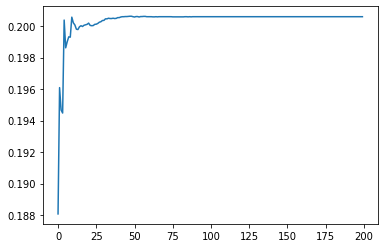

0.2003548329766474
1.2759918539377181e-06
1.395518335984478e-06


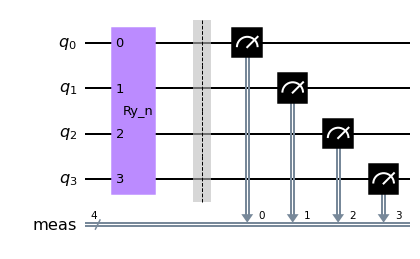

In [5]:
a=0.2
p=0.9
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_c=[]
n0=[]
n1=[]
n2=[]
Ng=[]
m=[]
qlist=[]
it=1
N=1000
n=4
amf=200
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
I_1=Operator([[1,0],[0,1]])
I_n=Operator([[1,0],[0,1]])
for o in range(n-2):
    I_n=I_1.tensor(I_n)
for k in range(amf):
    Ng.append(2*k+1)
    m.append(k+1)
    n0.append([])
    n1.append([])
    n2.append([])
    for i in range(it):
        Ry=Operator(RYGate(2*Ng[k]*theta))
        Ry_n=I_n.tensor(Ry)
        circ_c_n=QuantumCircuit(n)
        circ_c_n.unitary(Ry_n,qlist,label='Ry_n')
        circ_c_n.measure_all()
        # Create an empty noise model
        noise_depolarizing = NoiseModel()
        noise_depolarizing.add_basis_gates(['unitary'])
        # Add depolarizing error to all single qubit u1, u2, u3 gates
        error = depolarizing_error(1-p**m[k], n)
        noise_depolarizing.add_all_qubit_quantum_error(error, 'Ry_n')
        # Create noisy simulator backend
        sim_noise = AerSimulator(noise_model=noise_depolarizing)
        # Transpile circuit for noisy basis gates
        circ_c_n_tnoise = transpile(circ_c_n, sim_noise)
        # Run and get counts
        result_noise = sim_noise.run(circ_c_n_tnoise,shots=N).result()
        counts_noise = result_noise.get_counts(0)
        n0[k].append(counts_noise[N0])
        n1[k].append(N-n0[k][i])
        def func(x):
            ans=0
            for l in range(k+1):
                for j in range(i+1):
                    angle=x[0]
                    ans+=np.log((p**m[l])*(np.cos(Ng[l]*angle)**2)+(1-p**m[l])/d)*n0[l][j]
                    ans+=np.log((p**m[l])*(np.sin(Ng[l]*angle)**2)+((d-1)*(1-p**m[l]))/d)*n1[l][j]
            return -ans
        x=opt.brute(func,[(0,pi/2)])
        opt_results_c.append(np.sin(x[0])**2)
plt.plot(opt_results_c)
plt.show()
print(statistics.mean(opt_results_c))
print(statistics.variance(opt_results_c))
print(sum((n-a)**2 for n in opt_results_c)/len(opt_results_c))
circ_c_n.draw('mpl')

固有ベクトル，計算基底測定比較

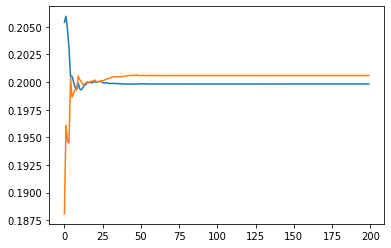

In [6]:
plt.plot(opt_results_e)
plt.plot(opt_results_c)
plt.show()

Fisher情報量との比較

In [42]:
SLD_1=[(2+(d-2)*p**m[n])/(16*d*m[n]**2*p**(2*m[n])) for n in range(amf)]
print(SLD_1)
print(sum(SLD_1))

[0.07040895061728394, 0.019855728928516992, 0.009968638203592789, 0.00634382941008445, 0.004600791705216762, 0.0036268318410556835, 0.0030303736039015944, 0.0026437983966244418, 0.0023852900122847266, 0.0022110208808997687, 0.0020958868101758053, 0.0020248233101232576, 0.0019885405788384707, 0.0019812840151506154, 0.001999596358446449, 0.0020416078957837713, 0.0021066213460532884, 0.002194870284363109, 0.0023073856090160194, 0.002445933601399285, 0.0026130050437256887, 0.0028118440095802723, 0.0030465104898234063, 0.0033219746021769334, 0.003644242644814508, 0.004020517195054407, 0.0044593951234210855, 0.004971108981846658, 0.005567818865530017, 0.006263963644169475, 0.007076682500176396, 0.00802632008692926, 0.009137031422023071, 0.01043750596252341, 0.011961834291195263, 0.013750545615510232, 0.015851850012730404, 0.018323126245492906, 0.02123270426465963, 0.02466200150077514, 0.028708084073326163, 0.033486738541891464, 0.039136157297083286, 0.04582136176045558, 0.053739512978974634,

[5.547945205479452, 44.26461769115442, 108.84831230542355, 188.57522565129545, 275.0885241261691, 362.005762967939, 444.58467144996087, 519.4386294274159, 584.2943258786942, 637.7851345420767, 679.2746842661074, 708.7059562695493, 726.4720158157672, 733.305185287273, 730.1820881384378, 718.2425341979352, 698.720670257321, 672.8871804782074, 642.001586478805, 607.2738694338434, 569.834724447094, 530.7137750491032, 490.82504194104234, 450.9588967821739, 411.77966075757325, 373.82794821417076, 337.5268225251163, 303.1908333228711, 271.0370439331516, 241.19723233878452, 213.73055125524118, 188.63605342530195, 165.86461683183646, 145.32993168992505, 126.91832903300168, 110.49733391578258, 95.92291152520494, 83.04544074456942, 71.71449758006553, 61.78256215648635, 53.1077802534582, 45.55591640801264, 39.001633245587236, 33.32922346260759, 28.43290894002254, 24.21680756696369, 20.594653828253758, 17.489345011643938, 14.832371652053169, 12.563178924402294, 10.62849530100471, 8.9816559391731, 7

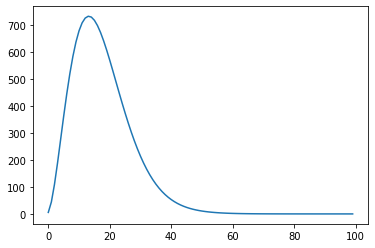

In [66]:
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
print(SLD)
print(1/(it*N*sum(SLD)))
plt.plot(SLD)
print(Ng)
print(m)
plt.show()

エンタングル状態での実験

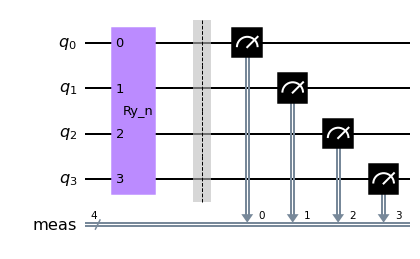

In [52]:
a=0.2
p=1
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_e=[]
n0=[]
n1=[]
n2=[]
theta_0=[pi/4]
Ng=[]
m=[]
qlist=[]
it=1
N=1000
n=4
amf=200
m=0
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
N1='0'*(n-1)+'1'
I_1=Operator([[1,0],[0,1]])
I_n=Operator([[1,0],[0,1]])
for o in range(n-2):
    I_n=I_1.tensor(I_n)
Ry=Operator(RYGate(2*(2*m+1)*theta))
Ry_n=I_n.tensor(Ry)
circ_e_n=QuantumCircuit(n)
circ_e_n.unitary(Ry_n,qlist,label='Ry_n')
circ_e_n.measure_all()
# Create an empty noise model
noise_depolarizing = NoiseModel()
noise_depolarizing.add_basis_gates(['unitary'])
error = depolarizing_error(1-p**(m+1), n)
noise_depolarizing.add_all_qubit_quantum_error(error, 'Ry_n')
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_depolarizing)
# Transpile circuit for noisy basis gates
circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
# Run and get counts
result_noise = sim_noise.run(circ_e_n_tnoise,shots=N).result()
counts_noise = result_noise.get_counts(0)
circ_e_n.draw('mpl')

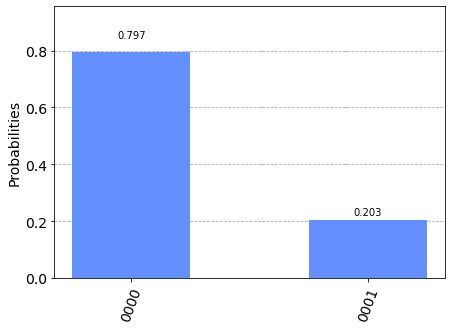

In [55]:
plot_histogram(counts_noise)

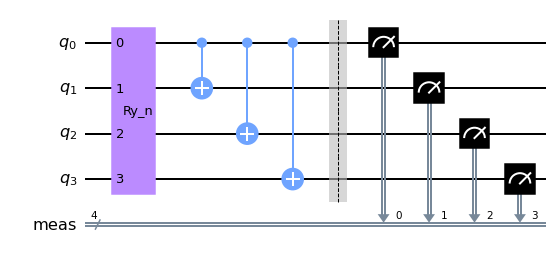

In [56]:
a=0.2
p=1
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_e=[]
n0=[]
n1=[]
n2=[]
theta_0=[pi/4]
Ng=[]
m=[]
qlist=[]
it=1
N=1000
n=4
amf=200
m=0
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
N1='0'*(n-1)+'1'
I_1=Operator([[1,0],[0,1]])
I_n=Operator([[1,0],[0,1]])
for o in range(n-2):
    I_n=I_1.tensor(I_n)
Ry=Operator(RYGate(2*(2*m+1)*theta))
Ry_n=I_n.tensor(Ry)
circ_e_n=QuantumCircuit(n)
circ_e_n.unitary(Ry_n,qlist,label='Ry_n')
for t in range(n-1):
    circ_e_n.cx(0,t+1)
circ_e_n.measure_all()
# Create an empty noise model
noise_depolarizing = NoiseModel()
noise_depolarizing.add_basis_gates(['unitary'])
error = depolarizing_error(1-p**(m+1), n)
noise_depolarizing.add_all_qubit_quantum_error(error, 'Ry_n')
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_depolarizing)
# Transpile circuit for noisy basis gates
circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
# Run and get counts
result_noise = sim_noise.run(circ_e_n_tnoise,shots=N).result()
counts_noise = result_noise.get_counts(0)
circ_e_n.draw('mpl')

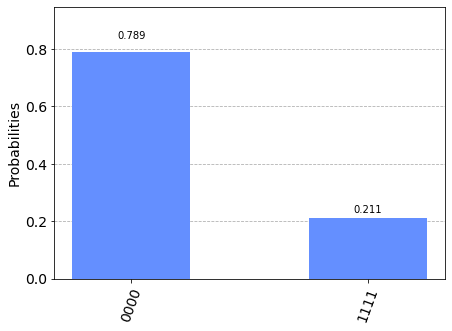

In [58]:
plot_histogram(counts_noise)

上記の量子状態をユニタリゲートで再現

In [84]:
d=10
a=[np.cos(theta/2),-np.sin(theta/2)]
b=[np.sin(theta/2),np.cos(theta/2)]
a[1:1]=[0]*(d-2)
b[1:1]=[0]*(d-2)
unitary=[a,b]
for k in range(d-2):
    n=[0]*(d-1)
    n.insert(k+1,1)
    unitary.insert(-1,n)
print(unitary)
R=Operator(unitary)

[[0.9732489894677302, 0, 0, 0, 0, 0, 0, 0, 0, -0.22975292054736118], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0.22975292054736118, 0, 0, 0, 0, 0, 0, 0, 0, 0.9732489894677302]]


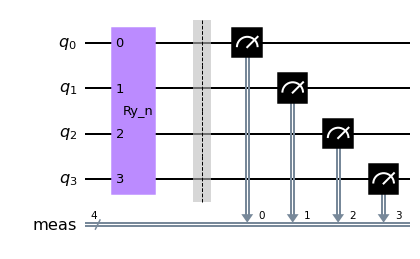

In [95]:
a=0.2
p=1
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_e=[]
n0=[]
n1=[]
n2=[]
theta_0=[pi/4]
Ng=[]
m=[]
qlist=[]
it=1
N=1000
n=4
amf=200
m=0
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
N1='0'*(n-1)+'1'
Ry=Operator(RYGate(2*(2*m+1)*theta))
Ry_n=I_n.tensor(Ry)
R_1=[np.cos(theta),-np.sin(theta)]
R_2=[np.sin(theta),np.cos(theta)]
R_1[1:1]=[0]*(d-2)
R_2[1:1]=[0]*(d-2)
R_d=[R_1,R_2]
for k in range(d-2):
    Z=[0]*(d-1)
    Z.insert(k+1,1)
    R_d.insert(-1,Z)
R=Operator(R_d)
circ_e_n=QuantumCircuit(n)
circ_e_n.unitary(R,qlist,label='Ry_n')
circ_e_n.measure_all()
# Create an empty noise model
noise_depolarizing = NoiseModel()
noise_depolarizing.add_basis_gates(['unitary'])
error = depolarizing_error(1-p**(m+1), n)
noise_depolarizing.add_all_qubit_quantum_error(error, 'Ry_n')
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_depolarizing)
# Transpile circuit for noisy basis gates
circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
# Run and get counts
result_noise = sim_noise.run(circ_e_n_tnoise,shots=N).result()
counts_noise = result_noise.get_counts(0)
circ_e_n.draw('mpl')

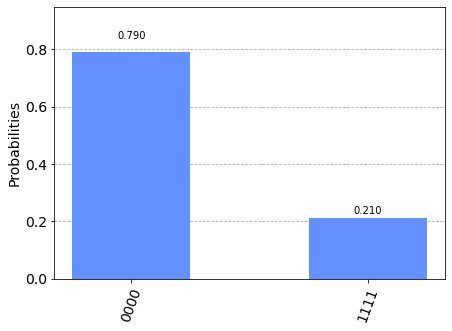

In [96]:
plot_histogram(counts_noise)

エンタングルadaptive測定

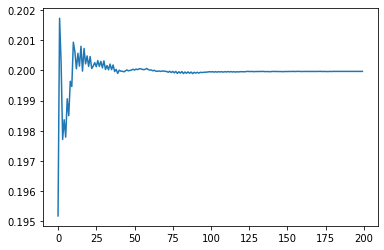

0.19994967888901324
2.3364683840600332e-07
2.3501081842491616e-07
3.187159803794346e-08


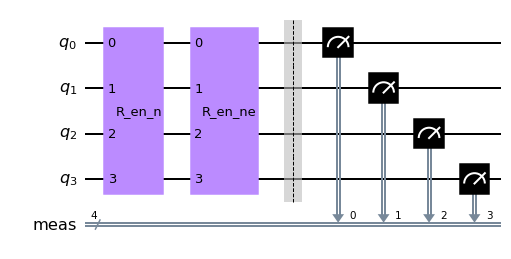

In [135]:
a=0.2
p=0.9
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_e=[]
n0=[]
n1=[]
n2=[]
theta_0=[pi/4]
Ng=[]
m=[]
qlist=[]
it=2
N=1000
n=4
amf=100
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
N1='1'*n
for k in range(amf):
    Ng.append(2*k+1)
    m.append(k+1)
    n0.append([])
    n1.append([])
    n2.append([])
    R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
    R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
    R_1[1:1]=[0]*(d-2)
    R_2[1:1]=[0]*(d-2)
    R_n=[R_1,R_2]
    for e in range(d-2):
        Z=[0]*(d-1)
        Z.insert(e+1,1)
        R_n.insert(-1,Z)
    R_en_n=Operator(R_n)
    for i in range(it):
        theta_e=Ng[k]*theta_0[i+k*it]+pi/4
        R_1e=[np.cos(-theta_e),-np.sin(-theta_e)]
        R_2e=[np.sin(-theta_e),np.cos(-theta_e)]
        R_1e[1:1]=[0]*(d-2)
        R_2e[1:1]=[0]*(d-2)
        R_ne=[R_1e,R_2e]
        for f in range(d-2):
            Ze=[0]*(d-1)
            Ze.insert(f+1,1)
            R_ne.insert(-1,Ze)
        R_en_ne=Operator(R_ne)
        circ_e_n=QuantumCircuit(n)
        circ_e_n.unitary(R_en_n,qlist,label='R_en_n')
        circ_e_n.unitary(R_en_ne,qlist,label='R_en_ne')
        circ_e_n.measure_all()
        # Create an empty noise model
        noise_depolarizing = NoiseModel()
        noise_depolarizing.add_basis_gates(['unitary'])
        # Add depolarizing error to all single qubit u1, u2, u3 gates
        error = depolarizing_error(1-p**m[k], n)
        noise_depolarizing.add_all_qubit_quantum_error(error, 'R_en_n')
        # Create noisy simulator backend
        sim_noise = AerSimulator(noise_model=noise_depolarizing)
        # Transpile circuit for noisy basis gates
        circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
        # Run and get counts
        result_noise = sim_noise.run(circ_e_n_tnoise,shots=N).result()
        counts_noise = result_noise.get_counts(0)
        n0[k].append(counts_noise[N0])
        n1[k].append(counts_noise[N1])
        n2[k].append(N-n0[k][i]-n1[k][i])
        def func(x):
            ans=0
            for l in range(k+1):
                for j in range(i+1):
                    angle=x[0]-theta_0[j+l*it]
                    ans+=np.log((p**m[l])*(1+np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n0[l][j]
                    ans+=np.log((p**m[l])*(1-np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n1[l][j]
                    ans+=np.log((d-2)*(1-p**m[l])/d)*n2[l][j]
            return -ans
        x=opt.brute(func,[(0,pi/2)])
        opt_results_e.append(np.sin(x[0])**2)
        theta_0.append(x[0])
plt.plot(opt_results_e)
plt.show()
print(statistics.mean(opt_results_e))
print(statistics.variance(opt_results_e))
print(sum((n-a)**2 for n in opt_results_e)/len(opt_results_e))
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
print(1/(it*N*sum(SLD)))
circ_e_n.draw('mpl')

複数回実験コード

[1.644481622311516e-06, 1.7390521491032692e-06, 3.56295284476769e-07, 7.056165366223722e-07, 1.3163227302059252e-06, 6.561255611417553e-07, 1.5263805718544257e-06, 7.932311148028974e-07, 5.058213366693877e-06, 9.914913921207595e-06]


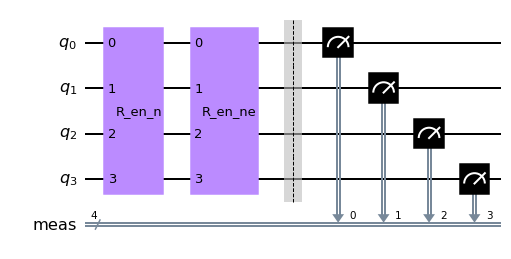

In [131]:
clt_opt_results_e=[]
ave_sq_error_e=[]
ex_it=10
for r in range(ex_it):
    a=0.2
    p=0.9
    pi=np.pi
    theta=np.arcsin(np.sqrt(a))
    opt_results_e=[]
    n0=[]
    n1=[]
    n2=[]
    theta_0=[pi/4]
    Ng=[]
    m=[]
    qlist=[]
    it=2
    N=1000
    n=4
    amf=50
    for q in range(n):
        qlist.append(q)
    d=2**n
    N0='0'*n
    N1='1'*n
    for k in range(amf):
        Ng.append(2*k+1)
        m.append(k+1)
        n0.append([])
        n1.append([])
        n2.append([])
        R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
        R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
        R_1[1:1]=[0]*(d-2)
        R_2[1:1]=[0]*(d-2)
        R_n=[R_1,R_2]
        for e in range(d-2):
            Z=[0]*(d-1)
            Z.insert(e+1,1)
            R_n.insert(-1,Z)
        R_en_n=Operator(R_n)
        for i in range(it):
            theta_e=Ng[k]*theta_0[i+k*it]+pi/4
            R_1e=[np.cos(-theta_e),-np.sin(-theta_e)]
            R_2e=[np.sin(-theta_e),np.cos(-theta_e)]
            R_1e[1:1]=[0]*(d-2)
            R_2e[1:1]=[0]*(d-2)
            R_ne=[R_1e,R_2e]
            for f in range(d-2):
                Ze=[0]*(d-1)
                Ze.insert(f+1,1)
                R_ne.insert(-1,Ze)
            R_en_ne=Operator(R_ne)
            circ_e_n=QuantumCircuit(n)
            circ_e_n.unitary(R_en_n,qlist,label='R_en_n')
            circ_e_n.unitary(R_en_ne,qlist,label='R_en_ne')
            circ_e_n.measure_all()
            # Create an empty noise model
            noise_depolarizing = NoiseModel()
            noise_depolarizing.add_basis_gates(['unitary'])
            # Add depolarizing error to all single qubit u1, u2, u3 gates
            error = depolarizing_error(1-p**m[k], n)
            noise_depolarizing.add_all_qubit_quantum_error(error, 'R_en_n')
            # Create noisy simulator backend
            sim_noise = AerSimulator(noise_model=noise_depolarizing)
            # Transpile circuit for noisy basis gates
            circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
            # Run and get counts
            result_noise = sim_noise.run(circ_e_n_tnoise,shots=N).result()
            counts_noise = result_noise.get_counts(0)
            n0[k].append(counts_noise[N0])
            n1[k].append(counts_noise[N1])
            n2[k].append(N-n0[k][i]-n1[k][i])
            def func(x):
                ans=0
                for l in range(k+1):
                    for j in range(i+1):
                        angle=x[0]-theta_0[j+l*it]
                        ans+=np.log((p**m[l])*(1+np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n0[l][j]
                        ans+=np.log((p**m[l])*(1-np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n1[l][j]
                        ans+=np.log((d-2)*(1-p**m[l])/d)*n2[l][j]
                return -ans
            x=opt.brute(func,[(0,pi/2)])
            opt_results_e.append(np.sin(x[0])**2)
            theta_0.append(x[0])
    ave_sq_error_e.append(sum((n-a)**2 for n in opt_results_e)/len(opt_results_e))
    clt_opt_results_e.append(opt_results_e)
print(ave_sq_error_e)
circ_e_n.draw('mpl')

In [132]:
print(statistics.mean(ave_sq_error_e))

2.3710632858420403e-06


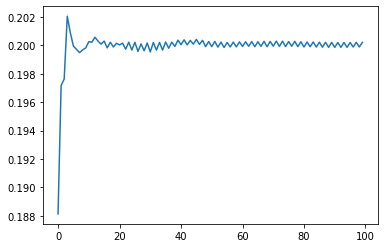

[[0.18813788686258062, 0.19716738191729208, 0.19763013664817708, 0.2020466014912862, 0.2008808280428483, 0.19995002815299898, 0.19971758145676072, 0.1994852362281543, 0.19967885020350895, 0.19981442192023102, 0.20026011478409267, 0.2002213441042997, 0.20057038147617068, 0.2002988882773387, 0.20008566888622067, 0.2002988882773387, 0.19982410693523428, 0.2002213441042997, 0.1998822207230837, 0.20014381118652852, 0.20002753291986627, 0.2001535021856279, 0.19972726471048557, 0.2002213441042997, 0.19966916783063637, 0.20021165187399623, 0.19957235379315927, 0.20010020386753746, 0.19962075860919917, 0.20016319336063074, 0.19953363311269032, 0.2002019598195619, 0.19966432671026998, 0.20020680582479503, 0.19966432671026998, 0.20023103651046678, 0.19979505241853693, 0.20022861339243817, 0.1999209667696424, 0.2003667486592958, 0.20004691087146936, 0.20038613892194454, 0.20003237734177737, 0.20034735909976, 0.20008566888622067, 0.20041522563415515, 0.20006628952693598, 0.20035220642372464, 0.1999

In [140]:
plt.plot(clt_opt_results_e[0])
plt.plot(clt_opt_results_c[0])
plt.show()

エンタングル状態の計算基底測定

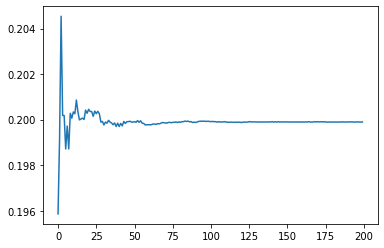

0.19991420433808058
2.2762355506112455e-07
2.3384633289001312e-07


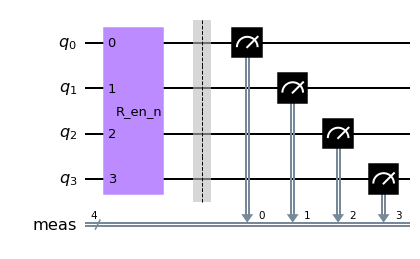

In [136]:
a=0.2
p=0.9
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_c=[]
n0=[]
n1=[]
n2=[]
Ng=[]
m=[]
qlist=[]
it=2
N=1000
n=4
amf=100
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
for k in range(amf):
    Ng.append(2*k+1)
    m.append(k+1)
    n0.append([])
    n1.append([])
    n2.append([])
    R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
    R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
    R_1[1:1]=[0]*(d-2)
    R_2[1:1]=[0]*(d-2)
    R_n=[R_1,R_2]
    for e in range(d-2):
        Z=[0]*(d-1)
        Z.insert(e+1,1)
        R_n.insert(-1,Z)
    R_en_n=Operator(R_n)
    for i in range(it):
        circ_c_n=QuantumCircuit(n)
        circ_c_n.unitary(R_en_n,qlist,label='R_en_n')
        circ_c_n.measure_all()
        # Create an empty noise model
        noise_depolarizing = NoiseModel()
        noise_depolarizing.add_basis_gates(['unitary'])
        # Add depolarizing error to all single qubit u1, u2, u3 gates
        error = depolarizing_error(1-p**m[k], n)
        noise_depolarizing.add_all_qubit_quantum_error(error, 'R_en_n')
        # Create noisy simulator backend
        sim_noise = AerSimulator(noise_model=noise_depolarizing)
        # Transpile circuit for noisy basis gates
        circ_c_n_tnoise = transpile(circ_c_n, sim_noise)
        # Run and get counts
        result_noise = sim_noise.run(circ_c_n_tnoise,shots=N).result()
        counts_noise = result_noise.get_counts(0)
        n0[k].append(counts_noise[N0])
        n1[k].append(N-n0[k][i])
        def func(x):
            ans=0
            for l in range(k+1):
                for j in range(i+1):
                    angle=x[0]
                    ans+=np.log((p**m[l])*(np.cos(Ng[l]*angle)**2)+(1-p**m[l])/d)*n0[l][j]
                    ans+=np.log((p**m[l])*(np.sin(Ng[l]*angle)**2)+((d-1)*(1-p**m[l]))/d)*n1[l][j]
            return -ans
        x=opt.brute(func,[(0,pi/2)])
        opt_results_c.append(np.sin(x[0])**2)
plt.plot(opt_results_c)
plt.show()
print(statistics.mean(opt_results_c))
print(statistics.variance(opt_results_c))
print(sum((n-a)**2 for n in opt_results_c)/len(opt_results_c))
circ_c_n.draw('mpl')

複数回実験コード

[2.4168249304706855e-06, 9.854403090963295e-05, 1.0070749697432769e-05, 2.571137489681344e-06, 2.4004736526892886e-06, 7.163301513073441e-06, 2.5095482491632473e-06, 1.687040984020495e-06, 5.321744744174373e-06, 5.2980903932690925e-06]


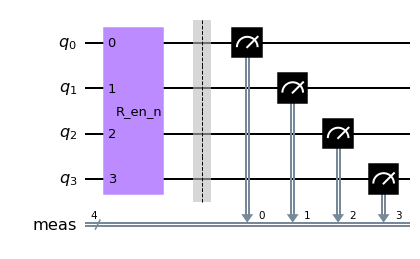

In [133]:
clt_opt_results_c=[]
ave_sq_error_c=[]
ex_it=10
for r in range(ex_it):
    a=0.2
    p=0.9
    pi=np.pi
    theta=np.arcsin(np.sqrt(a))
    opt_results_c=[]
    n0=[]
    n1=[]
    n2=[]
    Ng=[]
    m=[]
    qlist=[]
    it=2
    N=1000
    n=4
    amf=50
    for q in range(n):
        qlist.append(q)
    d=2**n
    N0='0'*n
    for k in range(amf):
        Ng.append(2*k+1)
        m.append(k+1)
        n0.append([])
        n1.append([])
        n2.append([])
        R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
        R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
        R_1[1:1]=[0]*(d-2)
        R_2[1:1]=[0]*(d-2)
        R_n=[R_1,R_2]
        for e in range(d-2):
            Z=[0]*(d-1)
            Z.insert(e+1,1)
            R_n.insert(-1,Z)
        R_en_n=Operator(R_n)
        for i in range(it):
            circ_c_n=QuantumCircuit(n)
            circ_c_n.unitary(R_en_n,qlist,label='R_en_n')
            circ_c_n.measure_all()
            # Create an empty noise model
            noise_depolarizing = NoiseModel()
            noise_depolarizing.add_basis_gates(['unitary'])
            # Add depolarizing error to all single qubit u1, u2, u3 gates
            error = depolarizing_error(1-p**m[k], n)
            noise_depolarizing.add_all_qubit_quantum_error(error, 'R_en_n')
            # Create noisy simulator backend
            sim_noise = AerSimulator(noise_model=noise_depolarizing)
            # Transpile circuit for noisy basis gates
            circ_c_n_tnoise = transpile(circ_c_n, sim_noise)
            # Run and get counts
            result_noise = sim_noise.run(circ_c_n_tnoise,shots=N).result()
            counts_noise = result_noise.get_counts(0)
            n0[k].append(counts_noise[N0])
            n1[k].append(N-n0[k][i])
            def func(x):
                ans=0
                for l in range(k+1):
                    for j in range(i+1):
                        angle=x[0]
                        ans+=np.log((p**m[l])*(np.cos(Ng[l]*angle)**2)+(1-p**m[l])/d)*n0[l][j]
                        ans+=np.log((p**m[l])*(np.sin(Ng[l]*angle)**2)+((d-1)*(1-p**m[l]))/d)*n1[l][j]
                return -ans
            x=opt.brute(func,[(0,pi/2)])
            opt_results_c.append(np.sin(x[0])**2)
    ave_sq_error_c.append(sum((n-a)**2 for n in opt_results_c)/len(opt_results_c))
    clt_opt_results_c.append(opt_results_c)
print(ave_sq_error_c)
circ_c_n.draw('mpl')

In [134]:
print(statistics.mean(ave_sq_error_c))

1.3798294256360769e-05


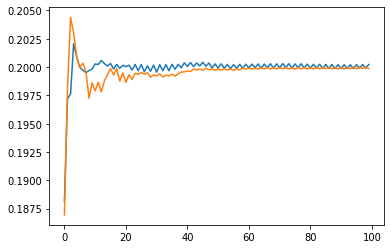

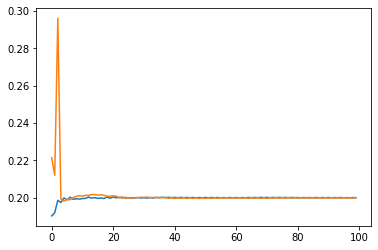

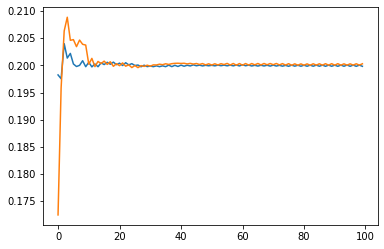

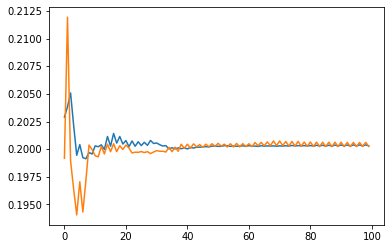

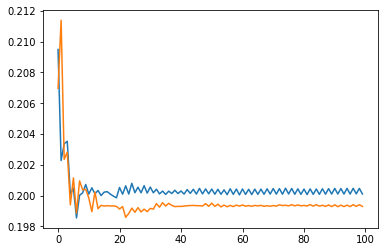

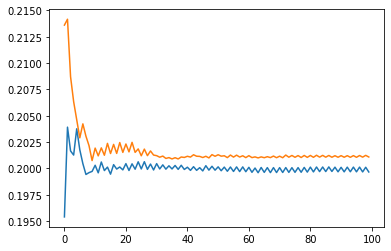

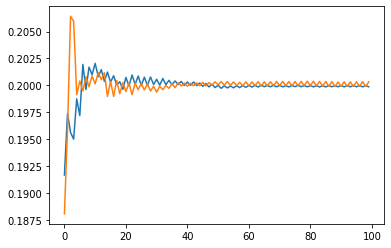

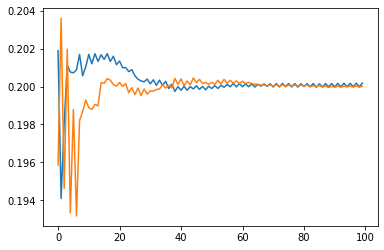

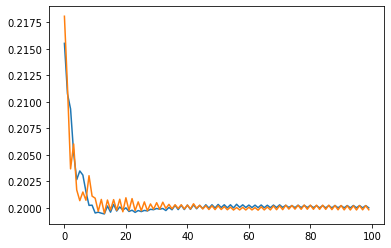

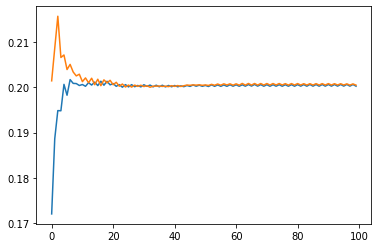

In [142]:
for m in range(ex_it):
    plt.plot(clt_opt_results_e[m])
    plt.plot(clt_opt_results_c[m])
    plt.show()

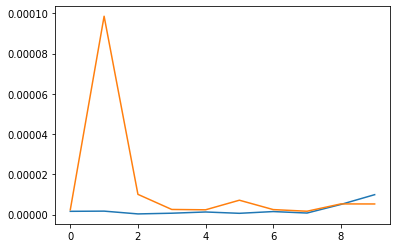

In [137]:
plt.plot(ave_sq_error_e)
plt.plot(ave_sq_error_c)
plt.show()

shot数変化版

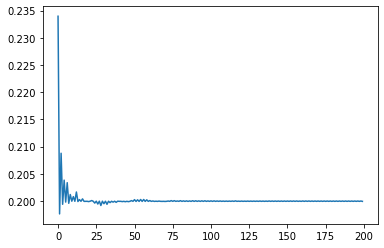

0.20021326008839951
6.334306379092809e-06
6.348114712501494e-06
1.593579901897173e-09


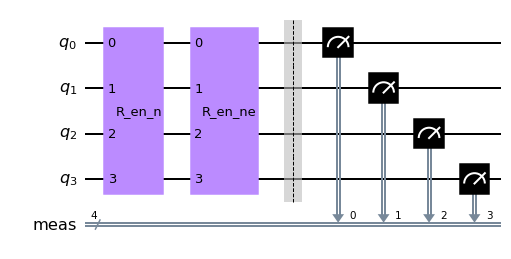

In [186]:
a=0.2
p=0.9
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_e=[]
n0=[]
n1=[]
n2=[]
theta_0=[pi/4]
Ng=[]
m=[]
qlist=[]
it=2
N=40000
n=4
amf=100
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
N1='1'*n
for k in range(amf):
    Ng.append(2*k+1)
    m.append(k+1)
    n0.append([])
    n1.append([])
    n2.append([])
    R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
    R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
    R_1[1:1]=[0]*(d-2)
    R_2[1:1]=[0]*(d-2)
    R_n=[R_1,R_2]
    for e in range(d-2):
        Z=[0]*(d-1)
        Z.insert(e+1,1)
        R_n.insert(-1,Z)
    R_en_n=Operator(R_n)
    for i in range(it):
        theta_e=Ng[k]*theta_0[i+k*it]+pi/4
        R_1e=[np.cos(-theta_e),-np.sin(-theta_e)]
        R_2e=[np.sin(-theta_e),np.cos(-theta_e)]
        R_1e[1:1]=[0]*(d-2)
        R_2e[1:1]=[0]*(d-2)
        R_ne=[R_1e,R_2e]
        for f in range(d-2):
            Ze=[0]*(d-1)
            Ze.insert(f+1,1)
            R_ne.insert(-1,Ze)
        R_en_ne=Operator(R_ne)
        circ_e_n=QuantumCircuit(n)
        circ_e_n.unitary(R_en_n,qlist,label='R_en_n')
        circ_e_n.unitary(R_en_ne,qlist,label='R_en_ne')
        circ_e_n.measure_all()
        # Create an empty noise model
        noise_depolarizing = NoiseModel()
        noise_depolarizing.add_basis_gates(['unitary'])
        # Add depolarizing error to all single qubit u1, u2, u3 gates
        error = depolarizing_error(1-p**m[k], n)
        noise_depolarizing.add_all_qubit_quantum_error(error, 'R_en_n')
        # Create noisy simulator backend
        sim_noise = AerSimulator(noise_model=noise_depolarizing)
        # Transpile circuit for noisy basis gates
        circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
        # Run and get counts
        if i==0:
            s=np.sqrt(N)
            result_noise = sim_noise.run(circ_e_n_tnoise,shots=s).result()
        else:
            s=N-np.sqrt(N)
            result_noise = sim_noise.run(circ_e_n_tnoise,shots=s).result()
        counts_noise = result_noise.get_counts(0)
        n0[k].append(counts_noise[N0])
        n1[k].append(counts_noise[N1])
        n2[k].append(s-n0[k][i]-n1[k][i])
        def func(x):
            ans=0
            for l in range(k+1):
                for j in range(i+1):
                    angle=x[0]-theta_0[j+l*it]
                    ans+=np.log((p**m[l])*(1+np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n0[l][j]
                    ans+=np.log((p**m[l])*(1-np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n1[l][j]
                    ans+=np.log((d-2)*(1-p**m[l])/d)*n2[l][j]
            return -ans
        x=opt.brute(func,[(0,pi/2)])
        opt_results_e.append(np.sin(x[0])**2)
        theta_0.append(x[0])
plt.plot(opt_results_e)
plt.show()
print(statistics.mean(opt_results_e))
print(statistics.variance(opt_results_e))
print(sum((n-a)**2 for n in opt_results_e)/len(opt_results_e))
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
print(1/(N*sum(SLD)))
circ_e_n.draw('mpl')

第二要素のみのSLD比較

0.19990781619005052
6.534065137741062e-08
1.6015878411026867e-09


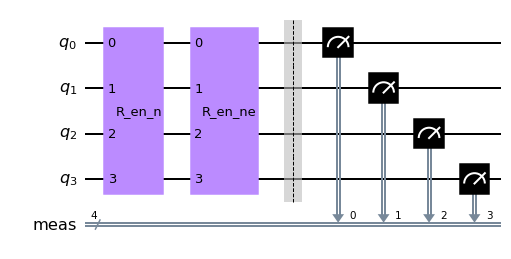

In [187]:
print(sum(opt_results_e[2*n+1] for n in range(int(len(opt_results_e)/2)))*2/len(opt_results_e))
print(sum((opt_results_e[2*n+1]-a)**2 for n in range(int(len(opt_results_e)/2)))*2/len(opt_results_e))
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
print(1/((N-np.sqrt(N))*sum(SLD)))
circ_e_n.draw('mpl')

adaptive,shot数1:1比較

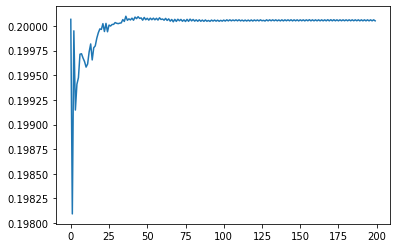

0.20001199257551272
3.326502331644605e-08
3.3242520067291746e-08
7.967899509485865e-10


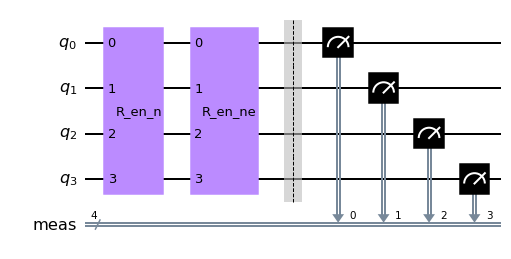

In [183]:
a=0.2
p=0.9
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_e=[]
n0=[]
n1=[]
n2=[]
theta_0=[pi/4]
Ng=[]
m=[]
qlist=[]
it=2
N=40000
n=4
amf=100
s=int((N-np.sqrt(N))/2)
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
N1='1'*n
for k in range(amf):
    Ng.append(2*k+1)
    m.append(k+1)
    n0.append([])
    n1.append([])
    n2.append([])
    R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
    R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
    R_1[1:1]=[0]*(d-2)
    R_2[1:1]=[0]*(d-2)
    R_n=[R_1,R_2]
    for e in range(d-2):
        Z=[0]*(d-1)
        Z.insert(e+1,1)
        R_n.insert(-1,Z)
    R_en_n=Operator(R_n)
    for i in range(it):
        theta_e=Ng[k]*theta_0[i+k*it]+pi/4
        R_1e=[np.cos(-theta_e),-np.sin(-theta_e)]
        R_2e=[np.sin(-theta_e),np.cos(-theta_e)]
        R_1e[1:1]=[0]*(d-2)
        R_2e[1:1]=[0]*(d-2)
        R_ne=[R_1e,R_2e]
        for f in range(d-2):
            Ze=[0]*(d-1)
            Ze.insert(f+1,1)
            R_ne.insert(-1,Ze)
        R_en_ne=Operator(R_ne)
        circ_e_n=QuantumCircuit(n)
        circ_e_n.unitary(R_en_n,qlist,label='R_en_n')
        circ_e_n.unitary(R_en_ne,qlist,label='R_en_ne')
        circ_e_n.measure_all()
        # Create an empty noise model
        noise_depolarizing = NoiseModel()
        noise_depolarizing.add_basis_gates(['unitary'])
        # Add depolarizing error to all single qubit u1, u2, u3 gates
        error = depolarizing_error(1-p**m[k], n)
        noise_depolarizing.add_all_qubit_quantum_error(error, 'R_en_n')
        # Create noisy simulator backend
        sim_noise = AerSimulator(noise_model=noise_depolarizing)
        # Transpile circuit for noisy basis gates
        circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
        # Run and get counts
        result_noise = sim_noise.run(circ_e_n_tnoise,shots=s).result()
        counts_noise = result_noise.get_counts(0)
        n0[k].append(counts_noise[N0])
        n1[k].append(counts_noise[N1])
        n2[k].append(s-n0[k][i]-n1[k][i])
        def func(x):
            ans=0
            for l in range(k+1):
                for j in range(i+1):
                    angle=x[0]-theta_0[j+l*it]
                    ans+=np.log((p**m[l])*(1+np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n0[l][j]
                    ans+=np.log((p**m[l])*(1-np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n1[l][j]
                    ans+=np.log((d-2)*(1-p**m[l])/d)*n2[l][j]
            return -ans
        x=opt.brute(func,[(0,pi/2)])
        opt_results_e.append(np.sin(x[0])**2)
        theta_0.append(x[0])
plt.plot(opt_results_e)
plt.show()
print(statistics.mean(opt_results_e))
print(statistics.variance(opt_results_e))
print(sum((n-a)**2 for n in opt_results_e)/len(opt_results_e))
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
print(1/(it*N*sum(SLD)))
circ_e_n.draw('mpl')

計算基底同shot数比較

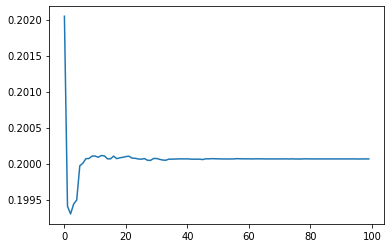

0.2000601777146314
5.74358084134493e-08
6.048280766756995e-08


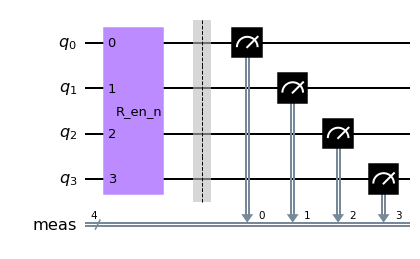

In [185]:
a=0.2
p=0.9
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_c=[]
n0=[]
n1=[]
n2=[]
Ng=[]
m=[]
qlist=[]
it=1
N=40000
n=4
amf=100
s=N-np.sqrt(N)
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
for k in range(amf):
    Ng.append(2*k+1)
    m.append(k+1)
    n0.append([])
    n1.append([])
    n2.append([])
    R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
    R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
    R_1[1:1]=[0]*(d-2)
    R_2[1:1]=[0]*(d-2)
    R_n=[R_1,R_2]
    for e in range(d-2):
        Z=[0]*(d-1)
        Z.insert(e+1,1)
        R_n.insert(-1,Z)
    R_en_n=Operator(R_n)
    for i in range(it):
        circ_c_n=QuantumCircuit(n)
        circ_c_n.unitary(R_en_n,qlist,label='R_en_n')
        circ_c_n.measure_all()
        # Create an empty noise model
        noise_depolarizing = NoiseModel()
        noise_depolarizing.add_basis_gates(['unitary'])
        # Add depolarizing error to all single qubit u1, u2, u3 gates
        error = depolarizing_error(1-p**m[k], n)
        noise_depolarizing.add_all_qubit_quantum_error(error, 'R_en_n')
        # Create noisy simulator backend
        sim_noise = AerSimulator(noise_model=noise_depolarizing)
        # Transpile circuit for noisy basis gates
        circ_c_n_tnoise = transpile(circ_c_n, sim_noise)
        # Run and get counts
        result_noise = sim_noise.run(circ_c_n_tnoise,shots=s).result()
        counts_noise = result_noise.get_counts(0)
        n0[k].append(counts_noise[N0])
        n1[k].append(s-n0[k][i])
        def func(x):
            ans=0
            for l in range(k+1):
                for j in range(i+1):
                    angle=x[0]
                    ans+=np.log((p**m[l])*(np.cos(Ng[l]*angle)**2)+(1-p**m[l])/d)*n0[l][j]
                    ans+=np.log((p**m[l])*(np.sin(Ng[l]*angle)**2)+((d-1)*(1-p**m[l]))/d)*n1[l][j]
            return -ans
        x=opt.brute(func,[(0,pi/2)])
        opt_results_c.append(np.sin(x[0])**2)
plt.plot(opt_results_c)
plt.show()
print(statistics.mean(opt_results_c))
print(statistics.variance(opt_results_c))
print(sum((n-a)**2 for n in opt_results_c)/len(opt_results_c))
circ_c_n.draw('mpl')

複数回実験

[2.618547436187757e-08, 1.4113029421726175e-08, 2.8514597448322877e-08, 5.112911057279777e-08, 6.669243300906363e-08, 3.6889940053902786e-07, 4.7768196901085605e-08, 4.461398171002443e-08, 6.532155161561496e-08, 3.2704313909200466e-09, 1.9506884711673208e-08, 9.10241723371869e-08, 6.130728965637372e-07, 2.355675311831526e-08, 2.1144817368157546e-07, 7.3883299333808776e-09, 2.579271996617587e-07, 1.3612689261983835e-07, 3.9474345024406203e-07, 6.759782619959315e-08, 2.640196721457109e-07, 1.0101647341661706e-07, 1.799131093612086e-07, 1.1408546943335992e-07, 5.837659903065992e-08, 3.108171391916766e-08, 6.911293541113703e-08, 6.10699359949656e-08, 8.987872126762235e-08, 1.2435957949002697e-07, 2.1553255359377703e-07, 1.9988900633737327e-07, 3.838407428862384e-08, 2.305662547181376e-07, 1.992206936807291e-08, 2.2227866645096307e-07, 3.891627285654521e-08, 1.7667560187172893e-07, 1.8739419833477767e-07, 3.0283193032865275e-08, 5.7936498539490865e-08, 5.9205773071861036e-08, 8.862855342008

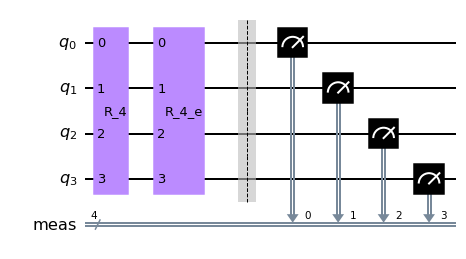

In [11]:
clt_opt_results_e_s=[]
ave_sq_error_e_s=[]
ex_it=100
for r in range(ex_it):
    a=0.2
    p=0.9
    pi=np.pi
    theta=np.arcsin(np.sqrt(a))
    opt_results_e_s=[]
    n0=[]
    n1=[]
    n2=[]
    theta_0=[pi/4]
    Ng=[]
    m=[]
    qlist=[]
    it=2
    N=40000
    n=4
    amf=50
    for q in range(n):
        qlist.append(q)
    d=2**n
    N0='0'*n
    N1='1'*n
    for k in range(amf):
        Ng.append(2*k+1)
        m.append(k+1)
        n0.append([])
        n1.append([])
        n2.append([])
        R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
        R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
        R_1[1:1]=[0]*(d-2)
        R_2[1:1]=[0]*(d-2)
        R_n=[R_1,R_2]
        for e in range(d-2):
            Z=[0]*(d-1)
            Z.insert(e+1,1)
            R_n.insert(-1,Z)
        R_en_n=Operator(R_n)
        for i in range(it):
            theta_e=Ng[k]*theta_0[i+k*it]+pi/4
            R_1e=[np.cos(-theta_e),-np.sin(-theta_e)]
            R_2e=[np.sin(-theta_e),np.cos(-theta_e)]
            R_1e[1:1]=[0]*(d-2)
            R_2e[1:1]=[0]*(d-2)
            R_ne=[R_1e,R_2e]
            for f in range(d-2):
                Ze=[0]*(d-1)
                Ze.insert(f+1,1)
                R_ne.insert(-1,Ze)
            R_en_ne=Operator(R_ne)
            circ_e_n=QuantumCircuit(n)
            circ_e_n.unitary(R_en_n,qlist,label='R_4')
            circ_e_n.unitary(R_en_ne,qlist,label='R_4_e')
            circ_e_n.measure_all()
            # Create an empty noise model
            noise_depolarizing = NoiseModel()
            noise_depolarizing.add_basis_gates(['unitary'])
            # Add depolarizing error to all single qubit u1, u2, u3 gates
            error = depolarizing_error(1-p**m[k], n)
            noise_depolarizing.add_all_qubit_quantum_error(error, 'R_4')
            # Create noisy simulator backend
            sim_noise = AerSimulator(noise_model=noise_depolarizing)
            # Transpile circuit for noisy basis gates
            circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
            # Run and get counts
            if i==0:
                s=np.sqrt(N)
                result_noise = sim_noise.run(circ_e_n_tnoise,shots=s).result()
            else:
                s=N-np.sqrt(N)
                result_noise = sim_noise.run(circ_e_n_tnoise,shots=s).result()
            counts_noise = result_noise.get_counts(0)
            n0[k].append(counts_noise[N0])
            n1[k].append(counts_noise[N1])
            n2[k].append(s-n0[k][i]-n1[k][i])
            def func(x):
                ans=0
                for l in range(k+1):
                    for j in range(i+1):
                        angle=x[0]-theta_0[j+l*it]
                        ans+=np.log((p**m[l])*(1+np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n0[l][j]
                        ans+=np.log((p**m[l])*(1-np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n1[l][j]
                        ans+=np.log((d-2)*(1-p**m[l])/d)*n2[l][j]
                return -ans
            x=opt.brute(func,[(0,pi/2)])
            opt_results_e_s.append(np.sin(x[0])**2)
            theta_0.append(x[0])
    ave_sq_error_e_s.append(sum((opt_results_e_s[2*n+1]-a)**2 for n in range(int(len(opt_results_e_s)/2)))*2/len(opt_results_e_s))
    clt_opt_results_e_s.append(opt_results_e_s)
print(ave_sq_error_e_s)
circ_e_n.draw('mpl')

[2.1509140948260092e-07, 7.573182303378723e-07, 1.7699846406229565e-06, 1.7078308205981124e-06, 7.227490334278941e-07, 1.4142444195076106e-06, 2.3126375453187002e-07, 1.0519787736567794e-06, 2.2445944415427126e-07, 9.35394185340282e-07, 4.0051391322913505e-07, 3.387633265953727e-07, 9.329400091399724e-07, 5.230466231033523e-07, 4.7010606256156027e-07, 4.5716158999381e-07, 5.344618112433589e-08, 4.412646105191811e-07, 3.235098242467379e-07, 1.1643680488086374e-07, 4.7274550235844654e-07, 2.6007921801537646e-07, 1.0329515186056366e-06, 3.1681322432769294e-07, 2.0299798467502062e-07, 2.5466583294672794e-07, 8.253076232076075e-07, 2.253139611491863e-07, 1.3032050237332565e-06, 1.2169075681131203e-06, 1.2491067645554175e-07, 5.869987647187342e-07, 1.3245529257585572e-08, 8.367915642243121e-07, 1.0409929606357808e-06, 5.80376718209877e-07, 4.266138726870469e-07, 7.178209925869096e-07, 1.2196084350457197e-07, 9.904471548669218e-08, 4.141476534197461e-07, 4.022414171015676e-07, 1.1675097660424

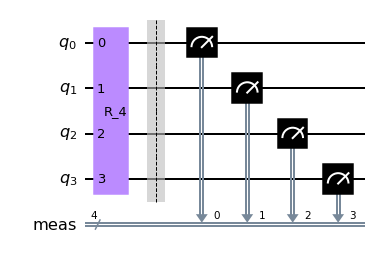

In [12]:
clt_opt_results_c=[]
ave_sq_error_c=[]
ex_it=100
for r in range(ex_it):
    a=0.2
    p=0.9
    pi=np.pi
    theta=np.arcsin(np.sqrt(a))
    opt_results_c=[]
    n0=[]
    n1=[]
    n2=[]
    Ng=[]
    m=[]
    qlist=[]
    it=1
    N=40000
    s=N-np.sqrt(N)
    n=4
    amf=50
    for q in range(n):
        qlist.append(q)
    d=2**n
    N0='0'*n
    for k in range(amf):
        Ng.append(2*k+1)
        m.append(k+1)
        n0.append([])
        n1.append([])
        n2.append([])
        R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
        R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
        R_1[1:1]=[0]*(d-2)
        R_2[1:1]=[0]*(d-2)
        R_n=[R_1,R_2]
        for e in range(d-2):
            Z=[0]*(d-1)
            Z.insert(e+1,1)
            R_n.insert(-1,Z)
        R_en_n=Operator(R_n)
        for i in range(it):
            circ_c_n=QuantumCircuit(n)
            circ_c_n.unitary(R_en_n,qlist,label='R_4')
            circ_c_n.measure_all()
            # Create an empty noise model
            noise_depolarizing = NoiseModel()
            noise_depolarizing.add_basis_gates(['unitary'])
            # Add depolarizing error to all single qubit u1, u2, u3 gates
            error = depolarizing_error(1-p**m[k], n)
            noise_depolarizing.add_all_qubit_quantum_error(error, 'R_4')
            # Create noisy simulator backend
            sim_noise = AerSimulator(noise_model=noise_depolarizing)
            # Transpile circuit for noisy basis gates
            circ_c_n_tnoise = transpile(circ_c_n, sim_noise)
            # Run and get counts
            result_noise = sim_noise.run(circ_c_n_tnoise,shots=s).result()
            counts_noise = result_noise.get_counts(0)
            n0[k].append(counts_noise[N0])
            n1[k].append(N-n0[k][i])
            def func(x):
                ans=0
                for l in range(k+1):
                    for j in range(i+1):
                        angle=x[0]
                        ans+=np.log((p**m[l])*(np.cos(Ng[l]*angle)**2)+(1-p**m[l])/d)*n0[l][j]
                        ans+=np.log((p**m[l])*(np.sin(Ng[l]*angle)**2)+((d-1)*(1-p**m[l]))/d)*n1[l][j]
                return -ans
            x=opt.brute(func,[(0,pi/2)])
            opt_results_c.append(np.sin(x[0])**2)
    ave_sq_error_c.append(sum((n-a)**2 for n in opt_results_c)/len(opt_results_c))
    clt_opt_results_c.append(opt_results_c)
print(ave_sq_error_c)
circ_c_n.draw('mpl')

[1.252739592876747e-07, 1.7863972920152993e-07, 5.4913634112101826e-08, 2.668670213113773e-07, 1.4792168955628346e-07, 6.637289819528938e-08, 8.581371015812387e-08, 2.183595879813177e-07, 1.0379029592735345e-07, 7.078537040148373e-08, 2.1461291168246822e-07, 5.0973375898194835e-08, 2.0214024525675395e-07, 2.8783998559661268e-08, 2.3341666677943843e-07, 6.724382996516457e-07, 9.486427344935355e-08, 4.6408598926344067e-07, 1.3001459803559622e-08, 3.1173688968873096e-07, 1.988525230822625e-07, 1.7602708045443597e-08, 5.427798302820412e-08, 4.704742914107887e-08, 1.0067495639895522e-07, 3.4771524102119196e-07, 3.4293087629898957e-07, 4.5784104507922104e-08, 8.589125124156491e-08, 4.05957418316466e-08, 1.2616501879971335e-07, 1.9000519925729268e-07, 5.688311905376192e-08, 1.84985549147501e-07, 6.802599674178161e-08, 1.9770563542037984e-07, 3.718024041145037e-08, 4.585935899741691e-08, 3.122830662979651e-07, 5.7093957113127025e-08, 2.008364716698757e-07, 8.130873030791222e-08, 1.106051621164

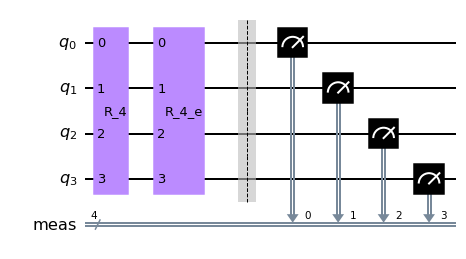

In [13]:
clt_opt_results_e=[]
ave_sq_error_e=[]
ex_it=100
for r in range(ex_it):
    a=0.2
    p=0.9
    pi=np.pi
    theta=np.arcsin(np.sqrt(a))
    opt_results_e=[]
    n0=[]
    n1=[]
    n2=[]
    theta_0=[pi/4]
    Ng=[]
    m=[]
    qlist=[]
    it=2
    N=40000
    s=int((N-np.sqrt(N))/2)
    n=4
    amf=50
    for q in range(n):
        qlist.append(q)
    d=2**n
    N0='0'*n
    N1='1'*n
    for k in range(amf):
        Ng.append(2*k+1)
        m.append(k+1)
        n0.append([])
        n1.append([])
        n2.append([])
        R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
        R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
        R_1[1:1]=[0]*(d-2)
        R_2[1:1]=[0]*(d-2)
        R_n=[R_1,R_2]
        for e in range(d-2):
            Z=[0]*(d-1)
            Z.insert(e+1,1)
            R_n.insert(-1,Z)
        R_en_n=Operator(R_n)
        for i in range(it):
            theta_e=Ng[k]*theta_0[i+k*it]+pi/4
            R_1e=[np.cos(-theta_e),-np.sin(-theta_e)]
            R_2e=[np.sin(-theta_e),np.cos(-theta_e)]
            R_1e[1:1]=[0]*(d-2)
            R_2e[1:1]=[0]*(d-2)
            R_ne=[R_1e,R_2e]
            for f in range(d-2):
                Ze=[0]*(d-1)
                Ze.insert(f+1,1)
                R_ne.insert(-1,Ze)
            R_en_ne=Operator(R_ne)
            circ_e_n=QuantumCircuit(n)
            circ_e_n.unitary(R_en_n,qlist,label='R_4')
            circ_e_n.unitary(R_en_ne,qlist,label='R_4_e')
            circ_e_n.measure_all()
            # Create an empty noise model
            noise_depolarizing = NoiseModel()
            noise_depolarizing.add_basis_gates(['unitary'])
            # Add depolarizing error to all single qubit u1, u2, u3 gates
            error = depolarizing_error(1-p**m[k], n)
            noise_depolarizing.add_all_qubit_quantum_error(error, 'R_4')
            # Create noisy simulator backend
            sim_noise = AerSimulator(noise_model=noise_depolarizing)
            # Transpile circuit for noisy basis gates
            circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
            # Run and get counts
            result_noise = sim_noise.run(circ_e_n_tnoise,shots=s).result()
            counts_noise = result_noise.get_counts(0)
            n0[k].append(counts_noise[N0])
            n1[k].append(counts_noise[N1])
            n2[k].append(N-n0[k][i]-n1[k][i])
            def func(x):
                ans=0
                for l in range(k+1):
                    for j in range(i+1):
                        angle=x[0]-theta_0[j+l*it]
                        ans+=np.log((p**m[l])*(1+np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n0[l][j]
                        ans+=np.log((p**m[l])*(1-np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n1[l][j]
                        ans+=np.log((d-2)*(1-p**m[l])/d)*n2[l][j]
                return -ans
            x=opt.brute(func,[(0,pi/2)])
            opt_results_e.append(np.sin(x[0])**2)
            theta_0.append(x[0])
    ave_sq_error_e.append(sum((n-a)**2 for n in opt_results_e)/len(opt_results_e))
    clt_opt_results_e.append(opt_results_e)
print(ave_sq_error_e)
circ_e_n.draw('mpl')

In [14]:
import pandas as pd
pd.to_pickle(ave_sq_error_e_s, "ave_sq_error_e_s_4")#保存
pd.to_pickle(ave_sq_error_e, "ave_sq_error_e_4")
pd.to_pickle(ave_sq_error_c, "ave_sq_error_c_4")
pd.to_pickle(clt_opt_results_e_s,"clt_opt_results_e_s_4")
pd.to_pickle(clt_opt_results_e,"clt_opt_results_e_4")
pd.to_pickle(clt_opt_results_c,"clt_opt_results_c_4")

In [9]:
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
SLD_sum=1/((N-np.sqrt(N))*sum(SLD))
ave_sq_error_ideal=[SLD_sum]*10
print(ave_sq_error_ideal)

[1.6084563978088068e-09, 1.6084563978088068e-09, 1.6084563978088068e-09, 1.6084563978088068e-09, 1.6084563978088068e-09, 1.6084563978088068e-09, 1.6084563978088068e-09, 1.6084563978088068e-09, 1.6084563978088068e-09, 1.6084563978088068e-09]


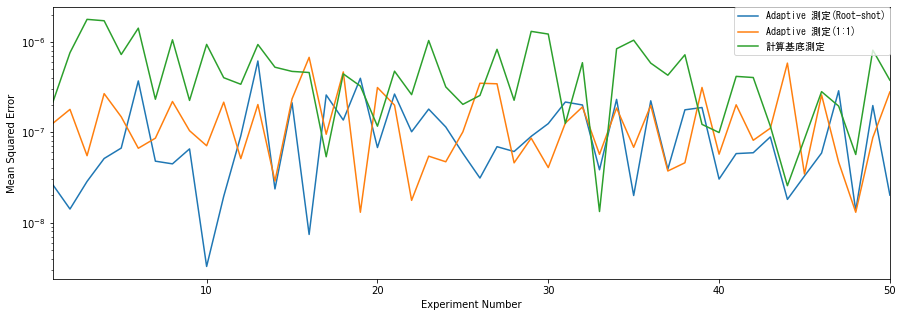

In [59]:
plt.figure(figsize=(15,5))
ax = plt.gca()
x=np.arange(1,51)
ax.set_yscale('log')
plt.xlabel("Experiment Number")
plt.ylabel("Mean Squared Error")
plt.xlim(1, 50)
plt.plot(x,ave_sq_error_e_s[0:50],label="Adaptive 測定(Root-shot)")
plt.plot(x,ave_sq_error_e[0:50],label="Adaptive 測定(1:1)")
plt.plot(x,ave_sq_error_c[0:50],label="計算基底測定")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=12,prop={"family":"MS Gothic"})
plt.show()

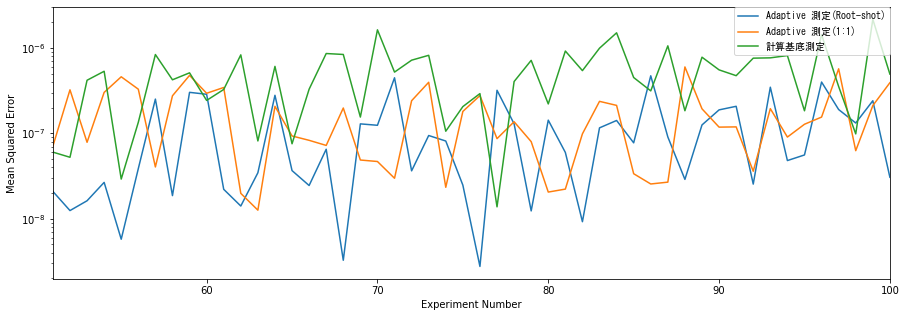

In [60]:
plt.figure(figsize=(15,5))
ax = plt.gca()
x=np.arange(51,101)
ax.set_yscale('log')
plt.xlabel("Experiment Number")
plt.ylabel("Mean Squared Error")
plt.xlim(51, 100)
plt.plot(x,ave_sq_error_e_s[50:100],label="Adaptive 測定(Root-shot)")
plt.plot(x,ave_sq_error_e[50:100],label="Adaptive 測定(1:1)")
plt.plot(x,ave_sq_error_c[50:100],label="計算基底測定")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=12,prop={"family":"MS Gothic"})
plt.show()

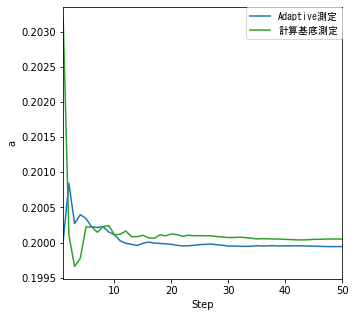

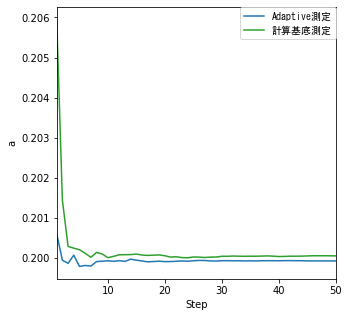

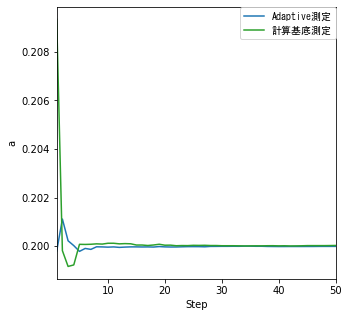

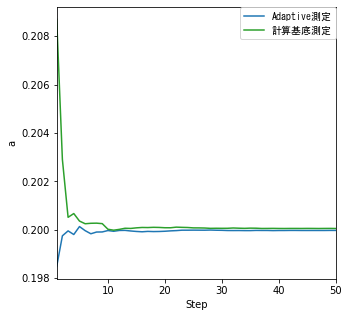

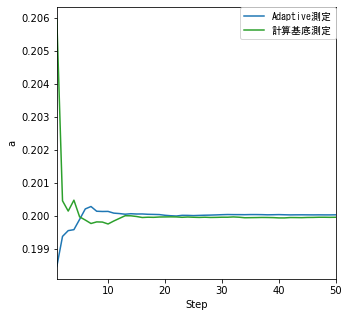

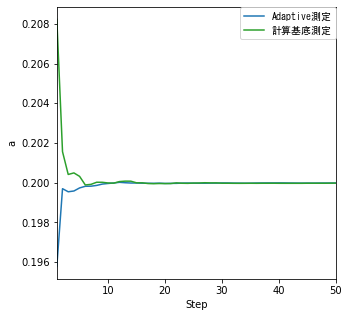

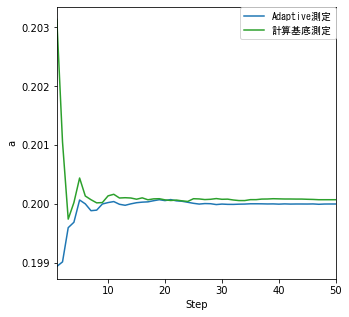

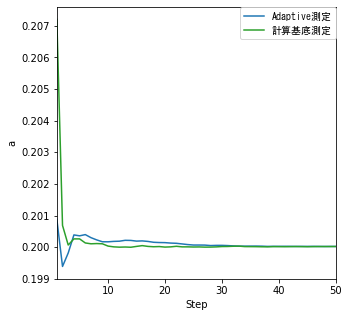

In [79]:
for m in range(8):
    plt.figure(figsize=(5,5))
    plt.xlim(1,50)
    x=np.arange(1,51)
    plt.xlabel("Step")
    plt.ylabel("a")
    plt.plot(x,clt_opt_results_e_s[m][1:101:2],color="tab:blue",label="Adaptive測定")
    plt.plot(x,clt_opt_results_c[m],color="tab:green",label="計算基底測定")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=12,prop={"family":"MS Gothic"})
    plt.show()

In [1]:
import pandas as pd
import numpy as np
ave_sq_error_e_s=pd.read_pickle("ave_sq_error_e_s_4")
ave_sq_error_e=pd.read_pickle("ave_sq_error_e_4")
ave_sq_error_c=pd.read_pickle("ave_sq_error_c_4")
print("Root分割の平均二乗誤差の平均は")
print(np.average(ave_sq_error_e_s))
print("1:1分割の平均二乗誤差の平均は")
print(np.average(ave_sq_error_e))
print("計算基底測定の平均二乗誤差の平均は")
print(np.average(ave_sq_error_c))

Root分割の平均二乗誤差の平均は
1.1806436391386766e-07
1:1分割の平均二乗誤差の平均は
1.6618283579060084e-07
計算基底測定の平均二乗誤差の平均は
5.432493393182395e-07
